# Feature Scaling - Flight cancellation

This notebook explores **2 approaches** to scale numeric features:
1. **StandardScaler** - Standardize features to zero mean and unit variance
2. **MinMaxScaler** - Scale features to a fixed range [0, 1]

Each approach is evaluated using Naive Bayes and KNN classifiers.

In [24]:
import sys
sys.path.insert(1, '../../../../utils')
import pandas as pd
from pandas import read_csv, DataFrame, Series, concat
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from dslabs_functions import *
from numpy import ndarray
from matplotlib.pyplot import savefig, show, figure

In [25]:
data: DataFrame = read_csv("../../data/prepared/flight_mvi.csv", na_values="")
target = "Cancelled"
target_name = "Cancelled"
file_tag = "flight"
metric="f1"
lab_folder_sca = "lab3_preparation/scaling"

data = data.sort_values(by="FlightDate", ascending=True)

variable_types: dict[str, list] = get_variable_types(data)
numeric_vars = variable_types['numeric']


## Approach 1: StandardScaler

Standardize features by removing the mean and scaling to unit variance.

Formula: `z = (x - mean) / std_dev`

In [26]:
approach_sca1 = "Standard-Scaler"

data_sca1 = data.copy()
flightdate_data: Series = data_sca1.pop("FlightDate")
target_data: Series = data_sca1.pop(target).astype(int)

split_index = int(len(data_sca1) * 0.7)
train_sca1 = data_sca1.iloc[:split_index].copy()
test_sca1 = data_sca1.iloc[split_index:].copy()

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(train_sca1[numeric_vars])

train_sca1[numeric_vars] = DataFrame(
    transf.transform(train_sca1[numeric_vars]), 
    index=train_sca1.index, 
    columns=numeric_vars
)
test_sca1[numeric_vars] = DataFrame(
    transf.transform(test_sca1[numeric_vars]), 
    index=test_sca1.index, 
    columns=numeric_vars
)

train_sca1[target_name] = target_data.iloc[:split_index]
test_sca1[target_name] = target_data.iloc[split_index:]

data_sca1 = pd.concat([train_sca1, test_sca1], ignore_index=False)

Couldn't run MultinomialNB


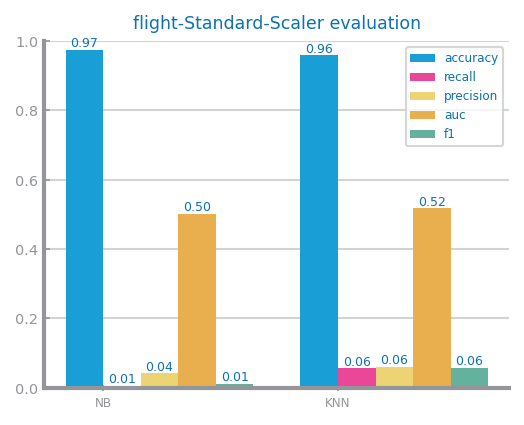

In [27]:
figure()
eval: dict[str, list] = evaluate_approach(train_sca1, test_sca1, target=target, metric="recall")
eval_metrics = {k: v for k, v in eval.items() if k != 'confusion_matrix'}
plot_multibar_chart(
    ["NB", "KNN"], eval_metrics, title=f"{file_tag}-{approach_sca1} evaluation", percentage=True
)
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca1}_nb_vs_knn_performance.png", bbox_inches='tight')
show()

data_sca1["FlightDate"] = flightdate_data

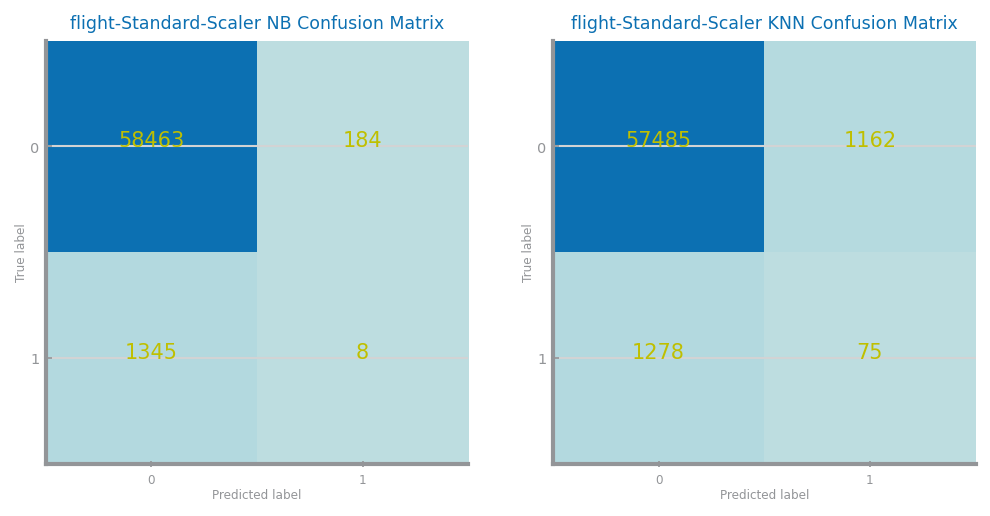

In [28]:
fig, axs = subplots(1, 2, figsize=(2 * HEIGHT, HEIGHT))
labels = data_sca1[target_name].unique()
labels.sort()
plot_confusion_matrix(eval["confusion_matrix"][0], labels, ax=axs[0])
axs[0].set_title(f"{file_tag}-{approach_sca1} NB Confusion Matrix")
plot_confusion_matrix(eval["confusion_matrix"][1], labels, ax=axs[1])
axs[1].set_title(f"{file_tag}-{approach_sca1} KNN Confusion Matrix")
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca1}_nb_vs_knn_confusion_matrix.png", bbox_inches='tight')
show()

## Approach 2: MinMaxScaler

Transform features by scaling each feature to the range [0, 1].

Formula: `x_scaled = (x - x_min) / (x_max - x_min)`

In [29]:
approach_sca2 = "MinMax-Scaler"

data_sca2 = data.copy()
flightdate_data: Series = data_sca2.pop("FlightDate")
target_data: Series = data_sca2.pop(target).astype(int)

split_index = int(len(data_sca2) * 0.7)
train_sca2 = data_sca2.iloc[:split_index].copy()
test_sca2 = data_sca2.iloc[split_index:].copy()

transf: MinMaxScaler = MinMaxScaler(feature_range=(0,1), copy=True).fit(train_sca2[numeric_vars])

train_sca2[numeric_vars] = DataFrame(
    transf.transform(train_sca2[numeric_vars]), 
    index=train_sca2.index, 
    columns=numeric_vars
)
test_sca2[numeric_vars] = DataFrame(
    transf.transform(test_sca2[numeric_vars]), 
    index=test_sca2.index, 
    columns=numeric_vars
)

train_sca2[target_name] = target_data.iloc[:split_index]
test_sca2[target_name] = target_data.iloc[split_index:]

data_sca2 = pd.concat([train_sca2, test_sca2], ignore_index=False)

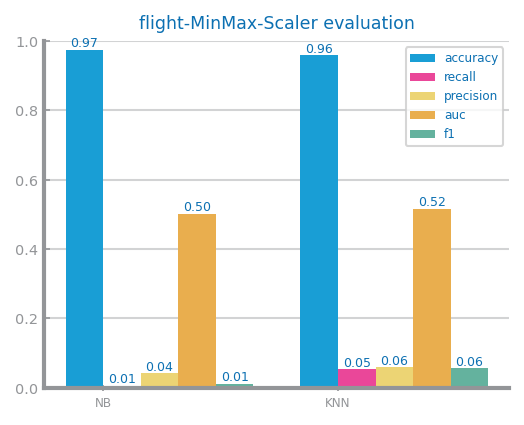

In [30]:

figure()
eval: dict[str, list] = evaluate_approach(train_sca2, test_sca2, target=target, metric="recall")

eval_metrics = {k: v for k, v in eval.items() if k != 'confusion_matrix'}

plot_multibar_chart(
    ["NB", "KNN"], eval_metrics, title=f"{file_tag}-{approach_sca2} evaluation", percentage=True
)
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca2}_nb_vs_knn_performance.png", bbox_inches='tight')
show()

# Restore FlightDate column
data_sca2["FlightDate"] = flightdate_data

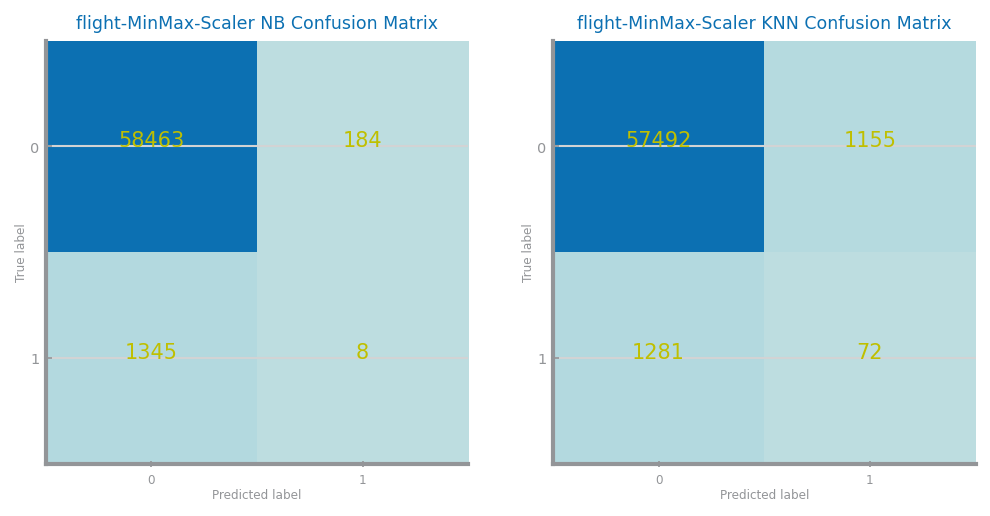

In [31]:
fig, axs = subplots(1, 2, figsize=(2 * HEIGHT, HEIGHT))
labels = data_sca2[target_name].unique()
labels.sort()
plot_confusion_matrix(eval["confusion_matrix"][0], labels, ax=axs[0])
axs[0].set_title(f"{file_tag}-{approach_sca2} NB Confusion Matrix")
plot_confusion_matrix(eval["confusion_matrix"][1], labels, ax=axs[1])
axs[1].set_title(f"{file_tag}-{approach_sca2} KNN Confusion Matrix")
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca2}_nb_vs_knn_confusion_matrix.png", bbox_inches='tight')
show()

In [32]:
# Uncomment to save individual results
data_sca1.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca1}.csv", index=False)
data_sca2.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca2}.csv", index=False)